### 1. Цель: определить класс вина

### 2. Описание
По характеристикам вина определить его класс: красное или белое

### 3. Импортируем необходимые библиотеки

In [16]:
# библиотеки для анализа
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

#библиотеки алгоритмов классификации
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  

### 4. Импорт сырых данных и анализ

In [17]:
#импортируем датасет и посмотрим что внутри
path = os.path.abspath('../../Project_wine/')
df = pd.read_csv(path+'\\'+'data\external\winequalityN.csv', sep=',')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [20]:
# удалим дуликаты
df = df.drop_duplicates(keep='first')

#посмотрим на пропуски
df.isnull().sum() / len(df)

type                    0.000000
fixed acidity           0.001877
volatile acidity        0.001501
citric acid             0.000563
residual sugar          0.000375
chlorides               0.000375
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.001689
sulphates               0.000751
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [21]:
# пропусков мало, можно их дропнуть
df.dropna(inplace=True)
df.isnull().sum() / len(df)

type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [22]:
# присвоим классам числа
df.loc[df['type']=='red', 'type'] = 1
df.loc[df['type']=='white', 'type'] = 0
df['type'] = df['type'].astype('int')
df['type'].unique()

array([0, 1])

In [23]:
#запишим результат предообработанных данных
df.to_csv(path+'\\'+'data\processed\winequalityN.csv', sep=',')

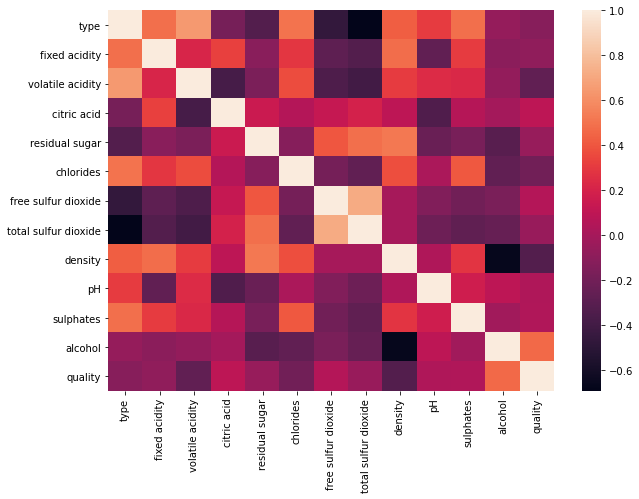

In [24]:
# Посмотрим есть ли зависимость между признаками
#К Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
sns.heatmap(df.corr())

Видно большую корреляцию плотности с алкоголем. Можно потом объединить эти переменные 

### 5. Подготовка к обучению
5.1 Отделяем данные обучения от данных тестирования

In [25]:
X = df.drop(['type'], axis=1)
y = df.loc[:, df.columns=='type']
y = np.array(y).reshape(-1,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42, shuffle=True)
X_train.shape, y_train.shape

((1323, 12), (1323,))

### 6. Обучаем и сравниваем модели

In [27]:
# попробуем логистическую регрессию, так как всего два класса
model = LogisticRegression()
#Обучим модель
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
model.score(X_train, y_train)

0.9735449735449735

In [29]:
model.score(X_test, y_test)

0.972809667673716

97 % процентов - неплохо. Теперь обучим модель для дерева решений

In [39]:
#сохраняем веса
model.coef_.dump(path+'\models\lin_weights.sav')

In [40]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.999244142101285, 0.9921953675730111)

99% ещё лучше

In [61]:
import joblib

In [63]:
joblib.dump(model, path+'\\models\\random_forest.joblib')

['C:\\Users\\Александр\\Documents\\Netology\\ML\\Section 6. Работа с заказчиком\\Project_wine\\models\\random_forest.joblib']

In [41]:
#сохраняем веса
model.coef_.dump(path+'\models\rndforest_weights.sav')

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

### Вывод - деревья работают лучше, будем использовать их

In [142]:
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

0.999244142101285


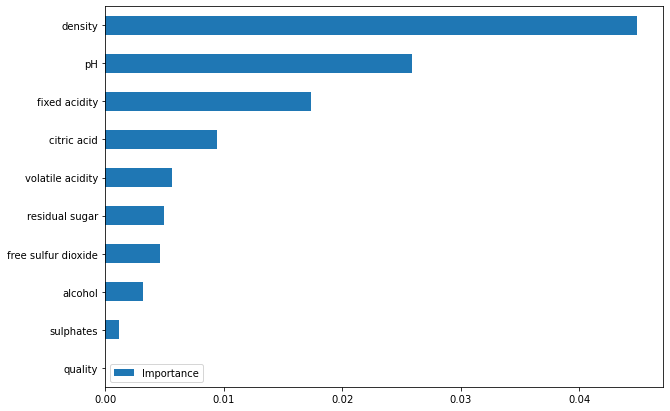

In [144]:
plot_variable_importance(X_train, y_train)